In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, Birch
from kneed import KneeLocator
from sklearn.manifold import TSNE
from scipy.cluster import hierarchy

In [5]:
import warnings
warnings.filterwarnings("ignore")

Let's start do clustering of our data.

In [6]:
df = pd.read_csv('df_after_data_processing.csv')

# K-means clustering

We will start with k-means clustering.

In [9]:
num = df.select_dtypes(include='number').columns
MMscaler = MinMaxScaler() #normalization
X = MMscaler.fit_transform(df[num])
tsne = TSNE(n_components=2, random_state=0)
X = tsne.fit_transform(X)
X.shape

(4468, 2)

Firstly, we need to calculate numbers of clusters. We can do that with the elbow method.

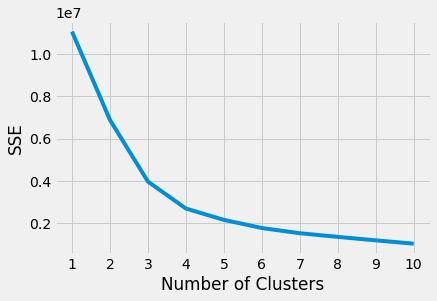

In [10]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

We can see that distortion improvement declines the most at 4 number of clusters. So that number we will use.

In [13]:
df = pd.read_csv('df_after_data_processing.csv')

Also, we can find k with help of kneed.

In [14]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

It's also 4.<br>
Let's make a plot of our clusters.

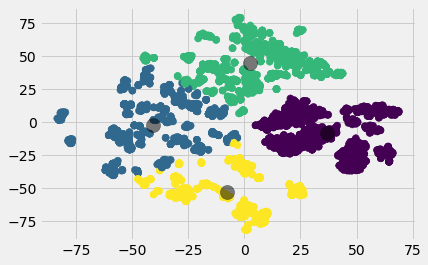

In [15]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

We can see 4 cluster centers and relatively good separation. Clusters almost do not overlap.<br>
There are centers of clusters.

In [16]:
kmeans.cluster_centers_

array([[ 36.945778 ,  -8.420611 ],
       [-40.50866  ,  -1.9197094],
       [  2.6190457,  44.578426 ],
       [ -7.5776052, -52.637302 ]], dtype=float32)

# Hierarchy clustering

Let's make hierarchy clustering with ICA.

In [17]:
df = pd.read_csv('df_after_data_processing.csv')
num = df.select_dtypes(include='number').columns
MMscaler = MinMaxScaler()
X = MMscaler.fit_transform(df[num])
tsne = TSNE(n_components=2, random_state=0)
X = tsne.fit_transform(X)

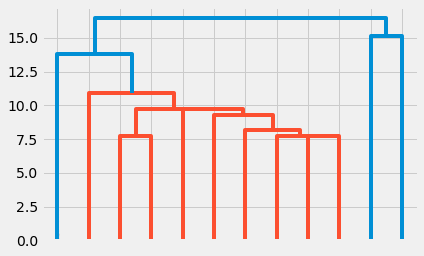

In [18]:
Z = hierarchy.linkage(X, 'single')
hierarchy.dendrogram(Z, truncate_mode='lastp', p=12, show_leaf_counts=False, leaf_font_size=12, show_contracted=True)
plt.show()

There are 2 main branches. One of them has 2 branches and the other also has 2 branches

# BIRCH clustering

And finally let's make BIRCH clustering.

In [19]:
df = pd.read_csv('df_after_data_processing.csv')
num = df.select_dtypes(include='number').columns
MMscaler = MinMaxScaler()
X = MMscaler.fit_transform(df[num])
tsne = TSNE(n_components=2, random_state=0)
X = tsne.fit_transform(X)

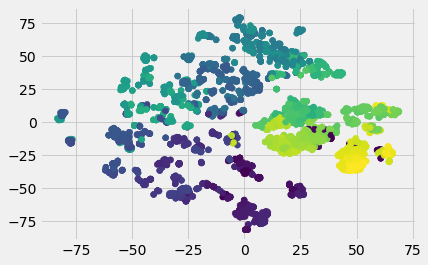

In [20]:
model = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)
model.fit(X)
pred = model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = pred)

We can see that our data has 4 or 5 clusters.

The most convenient method of clustering is k-means method.

# So, let's work with features

We will work with numerical features

In [131]:
num = df.select_dtypes(include='number').columns

In [132]:
df = df[num]

In [133]:
df

,measurement_method,raw_value,index,atom_stereo_count,bond_stereo_count,charge,complexity,covalent_unit_count,defined_atom_stereo_count,defined_bond_stereo_count,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0.0,1.33730,0.0,0.0,0.0,0.0,2.00,2.0,0.0,0.0,...,28.979311,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000e+09,0.0,0.512,0.0
1,1.0,1.50560,1.0,0.0,0.0,0.0,51.36,8.4,0.0,0.0,...,36.526391,64.872612,1.786056,79.811922,47.354221,2.211759,6.490000e+11,17.0,-0.858,109.2
2,0.0,1.62000,2.0,0.0,0.0,0.0,668.00,1.0,0.0,0.0,...,9.975277,58.509928,2.089640,19.478347,14.082025,2.948529,1.756000e+03,56.0,4.737,162.0
3,0.0,2.58000,3.0,0.0,0.0,2.0,4.00,3.0,0.0,0.0,...,39.462256,7.560601,1.890150,11.121202,5.782823,0.000000,7.000000e+00,0.0,-1.044,26.0
4,0.0,1.38333,4.0,0.0,0.0,0.0,7.20,1.0,0.0,0.0,...,5.004793,6.871320,1.717830,2.310660,2.310660,0.000000,1.000000e+01,1.0,0.282,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4463,0.0,1.41600,4463.0,0.0,0.0,0.0,11.50,1.0,0.0,0.0,...,12.246126,6.732051,1.683013,4.488034,0.000000,0.000000,9.000000e+00,0.0,1.816,12.0
4464,1.0,1.30000,4464.0,0.0,0.0,0.0,55.60,1.0,0.0,0.0,...,16.665602,10.523646,1.753941,9.301424,0.000000,0.000000,2.900000e+01,4.0,1.182,22.0
4465,1.0,2.00250,4465.0,0.0,0.0,0.0,228.00,1.0,0.0,0.0,...,10.420681,22.090095,1.840841,20.322830,17.127301,0.000000,2.270000e+02,10.0,-2.137,52.0
4466,2.0,1.39590,4466.0,0.0,0.0,0.0,17.60,1.0,0.0,0.0,...,4.938211,8.696802,1.739360,2.329115,2.329115,0.000000,1.800000e+01,2.0,0.579,16.0


Let's start out feature engineering with using featuretools library

In [134]:
import featuretools as ft

In [21]:
es = ft.EntitySet(id = 'df')

In [22]:
es = es.add_dataframe(dataframe_name = 'df', dataframe = df, index = 'index')

In [26]:
es

Entityset: df
  DataFrames:
    df [Rows: 4468, Columns: 1476]
  Relationships:
    No relationships

In [30]:
features, feature_names = ft.dfs(entityset=es, target_dataframe_name='df',
                                 max_depth = 2)

/home/pk/.local/lib/python3.10/site-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


Seems, there are a lot of parameters for using this method

So, we can use autofeat for generating new parameters

However, for using this libraty, regression problem should be formulated. So, let's use description of fragments of the molecule for prediction CrippenClogP value 

In [36]:
from autofeat.autofeat import AutoFeatRegressor
from sklearn.model_selection import train_test_split

In [33]:
df.columns.tolist()[:150]

['measurement_method',
 'raw_value',
 'index',
 'atom_stereo_count',
 'bond_stereo_count',
 'charge',
 'complexity',
 'covalent_unit_count',
 'defined_atom_stereo_count',
 'defined_bond_stereo_count',
 'exact_mass',
 'h_bond_acceptor_count',
 'h_bond_donor_count',
 'heavy_atom_count',
 'isotope_atom_count',
 'molecular_weight',
 'monoisotopic_mass',
 'rotatable_bond_count',
 'tpsa',
 'undefined_atom_stereo_count',
 'undefined_bond_stereo_count',
 'xlogp',
 'index.1',
 'exactmw',
 'amw',
 'lipinskiHBA',
 'lipinskiHBD',
 'NumRotatableBonds',
 'NumHBD',
 'NumHBA',
 'NumHeavyAtoms',
 'NumAtoms',
 'NumHeteroatoms',
 'NumAmideBonds',
 'FractionCSP3',
 'NumRings',
 'NumAromaticRings',
 'NumAliphaticRings',
 'NumSaturatedRings',
 'NumHeterocycles',
 'NumAromaticHeterocycles',
 'NumSaturatedHeterocycles',
 'NumAliphaticHeterocycles',
 'NumSpiroAtoms',
 'NumBridgeheadAtoms',
 'NumAtomStereoCenters',
 'NumUnspecifiedAtomStereoCenters',
 'labuteASA',
 'tpsa.1',
 'CrippenClogP',
 'CrippenMR',
 'chi

We will use:
 'lipinskiHBA',
 'lipinskiHBD',
 'NumRotatableBonds',
 'NumHBD',
 'NumHBA',
 'NumHeavyAtoms',
 'NumAtoms',
 'NumHeteroatoms',
 'NumAmideBonds',
 'FractionCSP3',
 'NumRings',
 'NumAromaticRings',
 'NumAliphaticRings',
 'NumSaturatedRings',
 'NumHeterocycles',
 'NumAromaticHeterocycles',
 'NumSaturatedHeterocycles',
 'NumAliphaticHeterocycles',
 'NumSpiroAtoms',
 'NumBridgeheadAtoms',
 'NumAtomStereoCenters',
 'NumUnspecifiedAtomStereoCenters' as descriptors (22). CrippenClogP will be predicted value

In [285]:
x = df.loc[:, 'lipinskiHBA': 'NumUnspecifiedAtomStereoCenters']
y = df.loc[:, 'CrippenClogP']

In [286]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [139]:
model = AutoFeatRegressor(apply_pi_theorem=True, categorical_cols=None,
          feateng_cols=None, feateng_steps=2, featsel_runs=3,
          transformations=('exp', 'log', 'abs', 'sqrt', '^2', '^3', '1/'),)
model

AutoFeatRegressor(featsel_runs=3,
                  transformations=('exp', 'log', 'abs', 'sqrt', '^2', '^3',
                                   '1/'))

In [142]:
X_train_tr = model.fit_transform(x_train, y_train) #increased number of descriptors
X_test_tr = model.transform(x_test) #increased number of descriptors

In [147]:
from sklearn.metrics import mean_squared_error, r2_score
print("autofeat new features:", len(model.new_feat_cols_)) #how many new features we will get
print("autofeat RMSE on training data:", np.sqrt(mean_squared_error(y_train, model.predict(X_train_tr))))
print("autofeat RMSE on test data:", np.sqrt(mean_squared_error(y_test, model.predict(X_test_tr))))
print("autofeat R^2 on training data:", r2_score(y_train, model.predict(X_train_tr)))
print("autofeat R^2 on test data:", r2_score(y_test, model.predict(X_test_tr)))

autofeat new features: 51
autofeat RMSE on training data: 0.9987665630410437
autofeat RMSE on test data: 1.1129846828869534
autofeat R^2 on training data: 0.9269684276057184
autofeat R^2 on test data: 0.8954003489456505


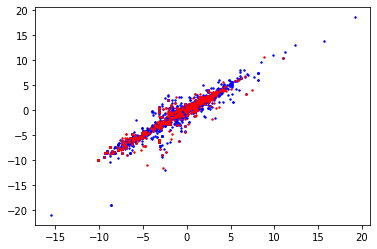

In [148]:
plt.figure() #visualise our results
plt.scatter(model.predict(X_train_tr), y_train.values, s=2, color = 'blue')
plt.scatter(model.predict(X_test_tr), y_test.values, s=2, color='red')

Let's see what descriptors we obtained

In [149]:
X_train_tr.columns.to_list()

['lipinskiHBA',
 'lipinskiHBD',
 'NumRotatableBonds',
 'NumHBD',
 'NumHBA',
 'NumHeavyAtoms',
 'NumAtoms',
 'NumHeteroatoms',
 'NumAmideBonds',
 'FractionCSP3',
 'NumRings',
 'NumAromaticRings',
 'NumAliphaticRings',
 'NumSaturatedRings',
 'NumHeterocycles',
 'NumAromaticHeterocycles',
 'NumSaturatedHeterocycles',
 'NumAliphaticHeterocycles',
 'NumSpiroAtoms',
 'NumBridgeheadAtoms',
 'NumAtomStereoCenters',
 'NumUnspecifiedAtomStereoCenters',
 'sqrt(NumHBA)/NumAtoms',
 'log(NumAtoms)/NumAtoms',
 'NumHBD*NumHeterocycles',
 'NumHeavyAtoms/NumAtoms',
 'NumAromaticRings/NumAtoms',
 'NumAromaticRings*sqrt(NumHBA)',
 'sqrt(NumHBA)*sqrt(lipinskiHBD)',
 'sqrt(FractionCSP3)*lipinskiHBD',
 'FractionCSP3*sqrt(NumAmideBonds)',
 'sqrt(NumAliphaticRings)*NumAtoms**2',
 'NumAromaticHeterocycles**2/NumAtoms',
 'NumAliphaticRings*NumHeteroatoms**2',
 'sqrt(lipinskiHBA)*exp(FractionCSP3)',
 'sqrt(NumHeavyAtoms)*exp(FractionCSP3)',
 'sqrt(FractionCSP3)*sqrt(NumHeteroatoms)',
 'sqrt(NumUnspecifiedAtomSter

There are a lot of descriptors and it is obvious that among them there are some the most important ones. Let's find them using genetic algorithm. We will use random forest regression model as universal one

In [287]:
x = X_train_tr
y = y_train

In [288]:
from genetic_selection import GeneticSelectionCV
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor()

model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="r2", max_features=5,
    n_population=5, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=500,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=100,
    caching=True, n_jobs=-1)

model = model.fit(x, y)

In [289]:
x_train, x_test, y_train, y_test = train_test_split(x[x.columns[model.support_]], y, test_size=0.2, random_state=10)

So we obtained 5 descriptors (initially we had 51). These descriptors contains expressions with values that physical related with LogP

In [290]:
print('Features:', x_train.columns)
len(x_train.columns)

Features: Index(['lipinskiHBA', 'NumRotatableBonds', 'NumSaturatedRings',
       'sqrt(FractionCSP3)*sqrt(NumHeavyAtoms)',
       'sqrt(NumAromaticRings)*sqrt(NumHeteroatoms)'],
      dtype='object')


5

We almost immidiately got the best result

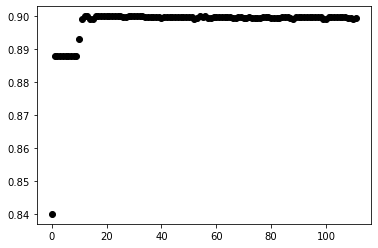

In [291]:
plt.plot(model.generation_scores_, 'o', color='black')

Let's check performance of our RFR ML model with obtained descriptors

In [294]:
estimator = estimator.fit(x_train.values, y_train.values)

RandomForestRegressor()


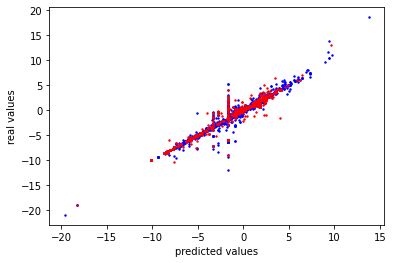

In [301]:
plt.figure()
plt.scatter(estimator.predict(x_train.values), y_train.values, s=2, color = 'blue')
plt.scatter(estimator.predict(x_test.values), y_test.values, s=2, color='red')
plt.xlabel('predicted values')
plt.ylabel('real values')
print(estimator)

Good result!

In [296]:
print("autofeat MSE on training data:", mean_squared_error(y_train, estimator.predict(x_train.values)))
print("autofeat MSE on test data:", mean_squared_error(y_test, estimator.predict(x_test.values)))
print("autofeat R^2 on training data:", r2_score(y_train, estimator.predict(x_train.values)))
print("autofeat R^2 on test data:", r2_score(y_test, estimator.predict(x_test.values)))

autofeat MSE on training data: 1.0056716011514821
autofeat MSE on test data: 1.1186605414799955
autofeat R^2 on training data: 0.9260691976464589
autofeat R^2 on test data: 0.9194163527243777


Let's use SHAP diagrams for interpretating results

100%|===================| 3557/3574 [00:24<00:00]        

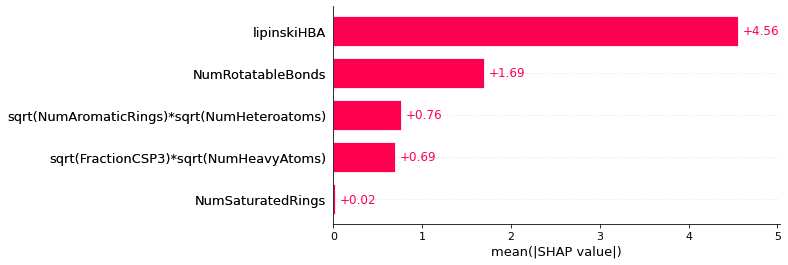

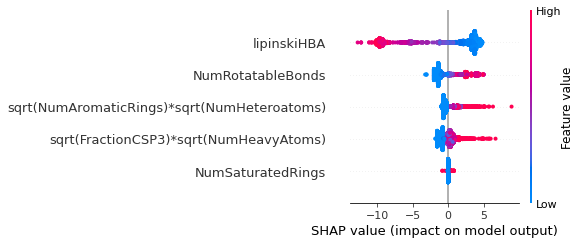

In [297]:
import shap
x = pd.DataFrame(x[x.columns[model.support_]], columns=x.columns[model.support_].to_list())
explainer = shap.TreeExplainer(estimator, x)
shap_values = explainer(x, check_additivity=False)
shap.plots.bar(shap_values, max_display=15)
shap.summary_plot(shap_values, x)

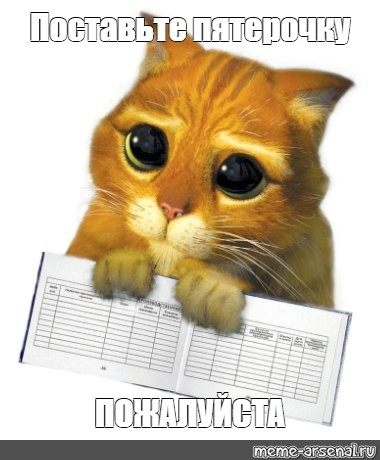